In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class K_Means_Algorithm:
    def __init__(self, number_of_clusters=2, iterations_maximum_limit=100, random_state=0):
        self.number_of_clusters = number_of_clusters
        self.iterations_maximum_limit = iterations_maximum_limit
        self.random_state = random_state
    
    def random_centroid_location(self, X): 
        random_id_in_X = np.random.RandomState(self.random_state).permutation(X.shape[0]) 
        centroid = X[random_id_in_X[:self.number_of_clusters]] 
        return centroid

    def find_the_average(self, X, label):
        centroid = np.zeros((self.number_of_clusters, X.shape[1]))
        for k in range(self.number_of_clusters):
            centroid[k, :] = np.mean(X[label == k, :], axis=0) 
        return centroid

    def find_the_euclidean_distance(self, X, centroid):
        dist = np.zeros((X.shape[0], self.number_of_clusters))
        for k in range(self.number_of_clusters):
            norm_of_row = np.linalg.norm(X - centroid[k, :], axis=1)
            dist[:, k] = np.square(norm_of_row)
        return dist
    
    def locating_the_nearby_cluster(self, dist):
        label = np.argmin(dist, axis=1)
        return label

    def calculate_sum_of_squared_distance(self, X, label, centroid):
        dist = np.zeros(X.shape[0])
        for k in range(self.number_of_clusters):
            dist[label == k] = np.linalg.norm(X[label == k] - centroid[k], axis=1)
        return np.sum(np.square(dist))

    def fit(self, X):
        self.centroid = self.random_centroid_location(X)
        for i in range(self.iterations_maximum_limit):
            previous_centroid = self.centroid
            dist = self.find_the_euclidean_distance(X, previous_centroid)
            self.label = self.locating_the_nearby_cluster(dist)
            self.centroid = self.find_the_average(X, self.label)
            if np.all(previous_centroid == self.centroid): 
                break
        self.difference = self.calculate_sum_of_squared_distance(X, self.label, self.centroid)
        return self.difference, self.centroid, self.label

    def predict(self, X):
        dist = self.find_the_euclidean_distance(X, previous_centroid)
        label = self.locating_the_nearby_cluster(dist)
        return label 

In [ ]:
def find_the_value_of_k(X,begin_K_value=1, stop_K_value=10):
    list_of_sum_of_sq_dist = []
    list_of_K_values = []
    for k in range(begin_K_value, stop_K_value):
        list_of_K_values.append(k)
        K_Means_Model = K_Means_Algorithm(number_of_clusters=k)    
        difference, centroid, label = K_Means_Model.fit(X)
        ssd = K_Means_Model.calculate_sum_of_squared_distance(Scaled_X,label,centroid)
        list_of_sum_of_sq_dist.append(ssd)
    plt.figure(figsize=(16,5))
    plt.plot(list_of_K_values, list_of_sum_of_sq_dist)
    plt.xlabel('No. of Clusters')
    plt.ylabel('Sum of squared distances')
    plt.title('Finding optimal k using elbow method')
    plt.show()

In [ ]:
import pandas as pd
iris_data = pd.read_csv("iris.data", header = None)
df = pd.read_csv ('iris.data')

df=df.rename(columns={'5.1':'sepal-len','3.5':'sepal-width','1.4':'petal-len','0.2':'petal-width','Iris-setosa':'class'})
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


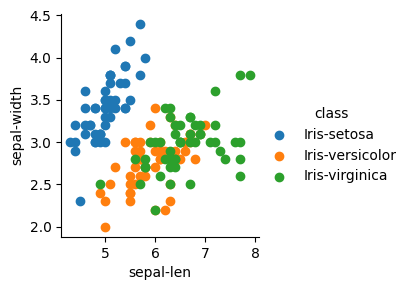

In [ ]:
import seaborn as sns
sns.FacetGrid(df, hue="class") \
   .map(plt.scatter, "sepal-len", "sepal-width") \
   .add_legend()

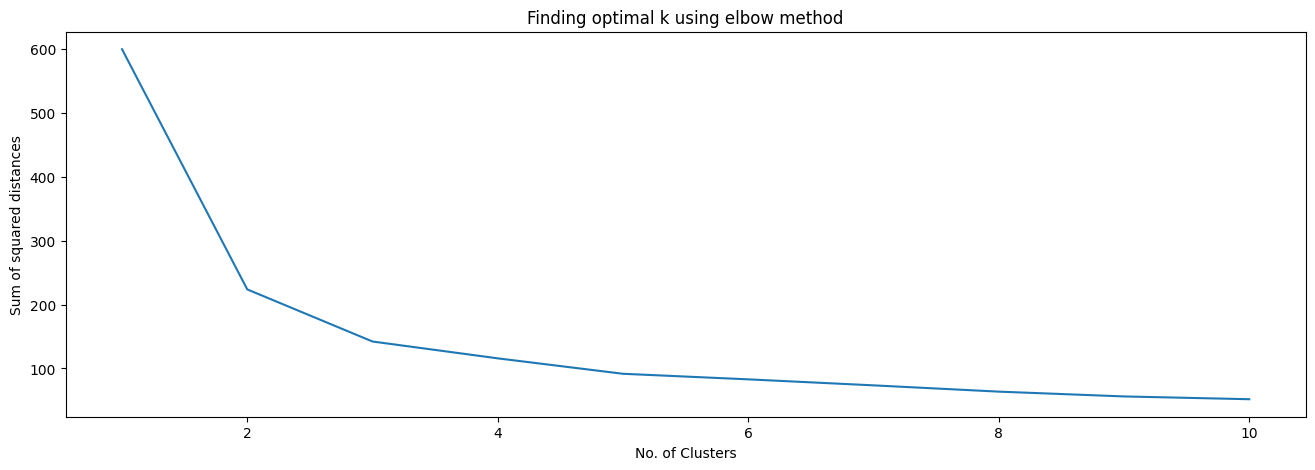

In [ ]:

X = np.array(iris_data.drop([iris_data.columns[-1]], axis = 1))
y = np.array(iris_data[iris_data.columns[-1]])

Scaled_X = (X - np.mean(X, axis= 0))/np.std(X, axis = 0)

find_the_value_of_k(Scaled_X,1,11)


model = K_Means_Algorithm(number_of_clusters=3)
difference, centroid, label = model.fit(Scaled_X)

In [ ]:
correct_label = y
predicted_label = label
number_of_correctly_predicted = 0
collect = {}
for i in np.unique(y):
    collect[i] = {}
    for j in range(3):
        collect[i][j] = []
for i in range(correct_label.shape[0]):
    collect[correct_label[i]][predicted_label[i]].append(1)
for i in np.unique(y):
    temp = -1
    for j in range(len(collect[i])):
        temp = max(temp,len(collect[i][j]))
        if temp == len(collect[i][j]):
            class_number_of_cluster = j
    print("Class {} is labelled as class {} ".format(i,class_number_of_cluster))
    number_of_correctly_predicted = number_of_correctly_predicted + temp
    
print(f'Accuracy = {round(number_of_correctly_predicted/correct_label.shape[0]*100,2)}%')

Class Iris-setosa is labelled as class 2 
Class Iris-versicolor is labelled as class 1 
Class Iris-virginica is labelled as class 0 
Accuracy = 85.33%
